# pyspark

Spark é uma framework de processamento de dados em larga escala e tempo real disponível em frameworks para Java, Scala e Python de maneira opensource. Ele promete ser 100x mais rápido que o `pandas` para grandes volumes de dados, pois o Spark contém algoritmos específicos de otimização de processos, definida como "lazy execution", que podem tornar o programa mais lento para pequenos datasets, porém veloz em grandes volumes de dados. Já o `pandas` adota a "eager execution", realizando o mesmo processo para pequenos e largos datasets, não se adaptando conforme a eficiência. 

Isso acontece por meio de sua técnica de processamento de grandes conjuntos de dados de forma paralela e distribuída, que estende o modelo de programação MapReduce popularizado pelo Apache Hadoop.

Dentro do Spark Core, que é o componente que disponibiliza as funções básicas para o processamento como map, reduce, filter e collect, temos acesso a diversos tipos de ferramentas (módulos), sendo eles:

* Spark SQL (sql) -> permite realizar consultas a bancos de dados, útil para quem não conhece a arquitetura do Spark.
* Spark Streaming (streaming) -> permite processar dados em tempo real
* MLlib (mllib) -> permite construir modelos de machine learning de larga escala
* GraphX -> permite trabalhar com grafos

#### Arquitetura do Spark



* **SparkSession()**: é instanciado inicialmente, e executa determinada aplicação (conjunto de tarefas) por meio de seus métodos. É necessário passar um driver dentro desse objeto, que repassa as informações para o Cluster Manager de forma a gerenciar o processo para que não ocorram falhas (Ex: falha de um computador em processamento na rede).

**Obs.:** O SparkSession surgiu com o Spark 2.0, como uma alternativa para a criação de um SparkContext com todas as configurações de um cluster, e alternativa para a criação de diferentes contextos para diferentes interações também. A SparkSession é uma unificação de todos os diferentes contextos que podem ser acessados através dela.

* **Cluster Manager**: Gerencia o processamento das aplicações em paralelo, podendo ser utilizadas diversas máquinas nesse processo (Worker Nodes) que executam as tarefas de forma agendada e de forma escalável. É um componente opcional que só é necessário se o Spark for executado de forma distribuída.



* **Workers**: São as máquinas que realmente executarão as tarefas que são enviadas pelo Driver Program. Se o Spark for executado de forma local, a máquina desempenhará tanto o papel de Driver Program quanto o de Worker.

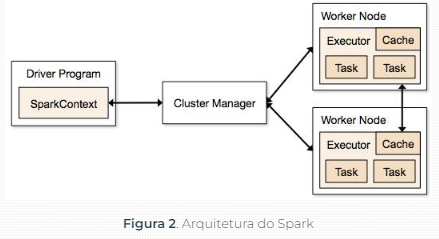

#### Resilient Distributed Datasets (RDD)

Abstraem um conjunto de objetos distribuídos no cluster, geralmente executados na memória principal. Ele é a estrutura de dados principal do modelo de programação do Spark, pois são nesses objetos que serão executados os processamentos dos dados, que são armazenados na memória do computador.

Um programa Spark normalmente é definido como uma sequência de transformações (operações) ou ações que são realizadas em um RDD. As
transformações podem ser definidas como como agrupamentos, filtros e mapeamentos entre os dados, e as ações como contagens, somas, salvamentos e o método show(), que printa o dataframe na tela. 

O Spark SQL adiciona mais uma abstração, chamada DataFrame, que é uma extensão do RDD. Ele organiza os dados em um formato de tabela e permite a manipulação dos dados de forma parecida com banco de dados relacionais, inclusive utilizando a Standard Query Language (SQL).

# Exemplos

#### Criando SparkSession

In [20]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate() # Cria uma sessão caso não encontre uma ativa
print(spark) # Classe do objeto criado
print(spark.catalog.listTables()) # Tabelas a serem manipuladas 

[Table(name='df', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


#### Carregando dataframe

In [15]:
df = spark.read.csv("wc2018-players.csv", header=True, inferSchema = True) # infere os tipos dos dados
print(type(df), "\n") # Objeto DataFrame criado

df.createOrReplaceTempView("df") # adicionando como tabela temporária no catálogo do Spark
print(spark.catalog.listTables(), "\n")

df.show(5) 

<class 'pyspark.sql.dataframe.DataFrame'> 

[Table(name='df', database=None, description=None, tableType='TEMPORARY', isTemporary=True)] 

+---------+---+----+------------------+----------+----------+--------------------+------+------+
|     Team|  #|Pos.| FIFA Popular Name|Birth Date|Shirt Name|                Club|Height|Weight|
+---------+---+----+------------------+----------+----------+--------------------+------+------+
|Argentina|  3|  DF|TAGLIAFICO Nicolas|31.08.1992|TAGLIAFICO|      AFC Ajax (NED)|   169|    65|
|Argentina| 22|  MF|    PAVON Cristian|21.01.1996|     PAVÓN|CA Boca Juniors (...|   169|    65|
|Argentina| 15|  MF|    LANZINI Manuel|15.02.1993|   LANZINI|West Ham United F...|   167|    66|
|Argentina| 18|  DF|    SALVIO Eduardo|13.07.1990|    SALVIO|    SL Benfica (POR)|   167|    69|
|Argentina| 10|  FW|      MESSI Lionel|24.06.1987|     MESSI|  FC Barcelona (ESP)|   170|    72|
+---------+---+----+------------------+----------+----------+--------------------+---

#### Utilizando SQL

In [16]:
df_10 = spark.sql("FROM df SELECT * LIMIT 10") # manipula tabela do catálogo do Spark
df_10.show()

+---------+---+----+------------------+----------+----------+--------------------+------+------+
|     Team|  #|Pos.| FIFA Popular Name|Birth Date|Shirt Name|                Club|Height|Weight|
+---------+---+----+------------------+----------+----------+--------------------+------+------+
|Argentina|  3|  DF|TAGLIAFICO Nicolas|31.08.1992|TAGLIAFICO|      AFC Ajax (NED)|   169|    65|
|Argentina| 22|  MF|    PAVON Cristian|21.01.1996|     PAVÓN|CA Boca Juniors (...|   169|    65|
|Argentina| 15|  MF|    LANZINI Manuel|15.02.1993|   LANZINI|West Ham United F...|   167|    66|
|Argentina| 18|  DF|    SALVIO Eduardo|13.07.1990|    SALVIO|    SL Benfica (POR)|   167|    69|
|Argentina| 10|  FW|      MESSI Lionel|24.06.1987|     MESSI|  FC Barcelona (ESP)|   170|    72|
|Argentina|  4|  DF|  ANSALDI Cristian|20.09.1986|   ANSALDI|     Torino FC (ITA)|   181|    73|
|Argentina|  5|  MF|      BIGLIA Lucas|30.01.1986|    BIGLIA|      AC Milan (ITA)|   175|    73|
|Argentina|  7|  MF|       BAN

#### Convertendo para DataFrame do Pandas

In [17]:
df_pd = df.toPandas()
df_pd.head()

,Team,#,Pos.,FIFA Popular Name,Birth Date,Shirt Name,Club,Height,Weight
0,Argentina,3,DF,TAGLIAFICO Nicolas,31.08.1992,TAGLIAFICO,AFC Ajax (NED),169,65
1,Argentina,22,MF,PAVON Cristian,21.01.1996,PAVÓN,CA Boca Juniors (ARG),169,65
2,Argentina,15,MF,LANZINI Manuel,15.02.1993,LANZINI,West Ham United FC (ENG),167,66
3,Argentina,18,DF,SALVIO Eduardo,13.07.1990,SALVIO,SL Benfica (POR),167,69
4,Argentina,10,FW,MESSI Lionel,24.06.1987,MESSI,FC Barcelona (ESP),170,72
